In [40]:
'''
Program to visualize the data from 3D element analysis
Unit: mm
Author: Yitian Shao
Created on 2021.06.08
'''
# Repeat IPython function to prevent some graphical glitches
%matplotlib notebook 
%matplotlib notebook 

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'font.size': 14})

#Pascal2Psi = 0.00014503773800722

In [2]:
'''
General Functions
'''

def aPlot(figName, is3D = False):
    ax = []
    
    fig1 = plt.figure(figsize = (10,4))
    fig1.suptitle(figName, fontsize=16)
    if(is3D):
        ax = fig1.add_subplot(111, projection='3d')
    else:
        ax = fig1.add_subplot(111)
        
    return ax

In [25]:
'''
Pouch Design
'''
pouchStructure = np.array([4, 3, 2, 1]) # Sealing dash number
rectNum = np.sum(pouchStructure + 1) # Number of rectangle pouch-cell
triNum = rectNum + np.sum(pouchStructure) # Number of triangle pouch-cell
print("Pouch contains totally %d rectangle and %d triangle" % (rectNum, triNum))

Pouch contains totally 14 rectange and 24 triangle


In [26]:
wCorrect = 2.0 # Correct factor for rectangle pouch w: w *= wCorrect

DATA_PATH = "./data/InfillPouchData.csv"
data = pd.read_csv(DATA_PATH)
print("Data contains %d rows and %d columns" % data.shape)

data['rectVol'] *= wCorrect
data['w'] *= wCorrect

data.head(1)

Data contains 100 rows and 11 columns


,m,c,R,triArc,triFA,triPSA,triVol,rectVol,triTF,rectTF,w
0,7.499996,13,4297.185652,15.0,0.06545,0.065523,0.638612,1.308996,124.153284,228.412861,20.0


In [30]:
'''
Additional Computation for the whole pouch 
'''
totalVol = (triNum * data['triVol'] + rectNum * data['rectVol']) # (mm3)
totalLength = (data['c'] + data['w']) * pouchStructure.size # (mm)
totalWidth = data['m'] * 2 * (np.amax(pouchStructure) + 1) # (mm)

triangleArea = data['c'] * data['m'] # (mm2) Top-view area of a triangle pouch (Not surface area)
rectangleArea = 2 * data['m'] * data['w'] # (mm2) Top-view area of a rectangle pouch (Not surface area)
totalArea = (triNum * triangleArea + rectNum * rectangleArea) # (mm2) Top-view area (Not surface area)
totalForce = (triNum * data['triTF'] + rectNum * data['rectTF']) # (Newton)
avgPressure = 10 * totalForce / totalArea # (Bar: 1 Bar = 1e5 Pascal)

cmRatio = data['c']/data['m'] # c to m ratio
sidetofront = data['triPSA']/data['triFA'] # area ratio between side and front


In [28]:
'''c to m ratio - area ratio between side and front, avg. pressure'''

# ind = (data['m'] == 7.5) #& (data['R'] > 10) 
# ind2 = ind & (totalVol > 4000); # Volume enough than ?/1000 mL

# fig1, ax1 = plt.subplots()
# fig1.suptitle('c to m ratio - flow area ratio', fontsize=16)

# ax1.set_xlabel('c to m Ratio')

# ax1.plot(cmRatio[ind], sidetofront[ind], '.', color='tab:red')
# ax1.plot(cmRatio[ind2], sidetofront[ind2], '.', color='tab:orange')
# #ax1.plot(data.loc[ind,'c'], sidetofront[ind], '.', color='tab:red')
# ax1.set_ylabel('Side divided by front area', color='tab:red')
# ax1.tick_params(axis='y', labelcolor='tab:red')

# ax2 = ax1.twinx() 
# ax2.plot(cmRatio[ind], 10 * data.loc[ind, 'triTF']/triangleArea[ind], '.', color='tab:blue')
# ax2.plot(cmRatio[ind2], 10 * data.loc[ind2, 'triTF']/triangleArea[ind2], '.', color='tab:cyan')
# #ax2.plot(data.loc[ind,'c'], 10 * data.loc[ind, 'triTF']/triangleArea[ind], '.', color='tab:blue')
# ax2.set_ylabel('Pressure (bar)', color='tab:blue')
# ax2.tick_params(axis='y', labelcolor='tab:blue')

# fig1.tight_layout() 

'c to m ratio - area ratio between side and front, avg. pressure'

<IPython.core.display.Javascript object>


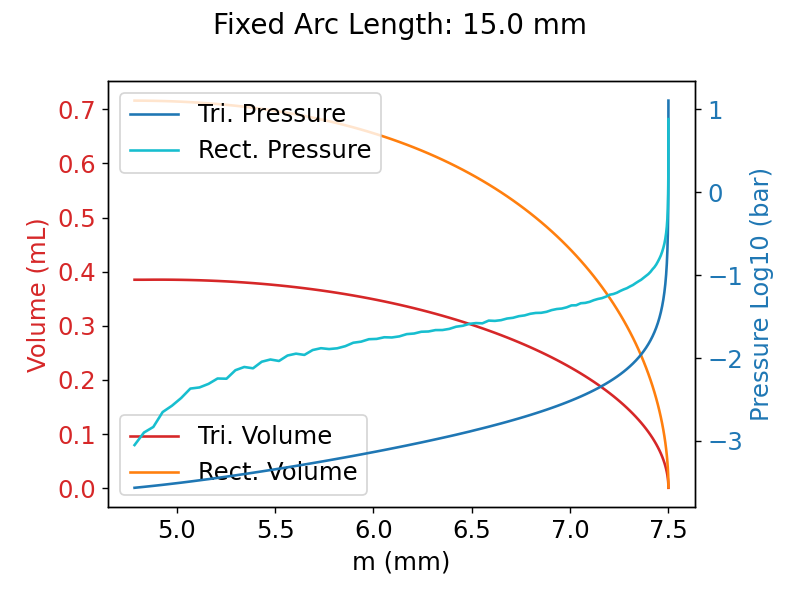

In [41]:
'''Fixed Arc Length'''

fig1, ax1 = plt.subplots()
fig1.suptitle(('Fixed Arc Length: %.1f mm' % data.loc[0,'triArc']), fontsize=16)

ax1.set_xlabel('m (mm)')

ax1.plot(data['m'], data['triVol']/1000, '-', color='tab:red')
ax1.plot(data['m'], data['rectVol']/1000, '-', color='tab:orange')
ax1.set_ylabel('Volume (mL)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.legend(['Tri. Volume','Rect. Volume'])

triPresBar = 10 * data['triTF']/triangleArea
rectPresBar = 10 * data['rectTF']/rectangleArea

ax2 = ax1.twinx() 
ax2.plot(data['m'], np.log10(triPresBar), '-', color='tab:blue')
ax2.plot(data['m'], np.log10(rectPresBar), '-', color='tab:cyan')
ax2.set_ylabel('Pressure Log10 (bar)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.legend(['Tri. Pressure','Rect. Pressure'])

fig1.tight_layout() 

<IPython.core.display.Javascript object>


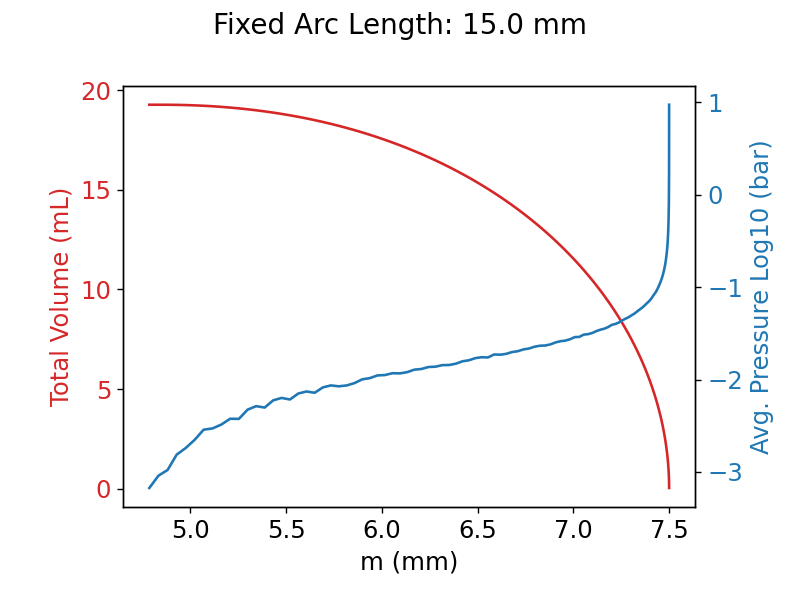

In [42]:
fig1, ax1 = plt.subplots()
fig1.suptitle(('Fixed Arc Length: %.1f mm' % data.loc[0,'triArc']), fontsize=16)

ax1.set_xlabel('m (mm)')

ax1.plot(data['m'], totalVol/1000, '-', color='tab:red')
ax1.set_ylabel('Total Volume (mL)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
# ax1.legend(['Total Volume','Rect. Volume'])

ax2 = ax1.twinx() 
ax2.plot(data['m'], np.log10(avgPressure), '-', color='tab:blue')
ax2.set_ylabel('Avg. Pressure Log10 (bar)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig1.tight_layout() 

<IPython.core.display.Javascript object>


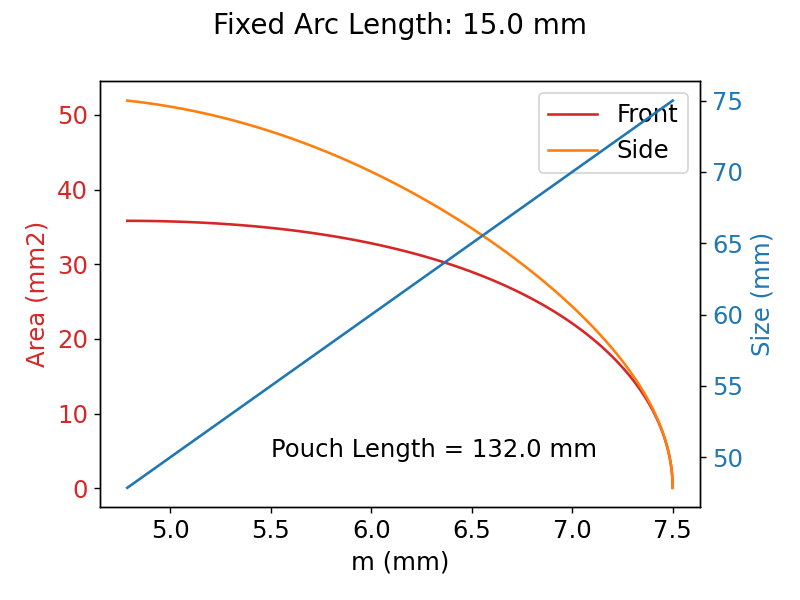

In [43]:
fig1, ax1 = plt.subplots()
fig1.suptitle(('Fixed Arc Length: %.1f mm' % data.loc[0,'triArc']), fontsize=16)

ax1.set_xlabel('m (mm)')

ax1.plot(data['m'], data['triFA'], '-', color='tab:red')
ax1.plot(data['m'], data['triPSA'], '-', color='tab:orange')
ax1.set_ylabel('Area (mm2)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.legend(['Front','Side'])

ax2 = ax1.twinx() 
ax2.plot(data['m'], totalWidth, '-', color='tab:blue')
#ax2.plot(data['m'], totalLength, '-', color='tab:cyan')
ax2.set_ylabel('Size (mm)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
#ax2.legend(['(Bottom) Width','Length'])
ax2.text(5.5, 50, ("Pouch Length = %.1f mm" % totalLength[0]))

fig1.tight_layout() 